# Cleaning & Preprocessing Pipeline


- Preprocessing is performed for a TF-IDF representation. Text-to-DFM representations are explained in the [Document Term Matrices Notebook.](10.extra_Document_Term_Matrices.ipynb)

- A hybrid pipeline repurposes the custom **DocumentToWordCounterTransformer** class and includes sklearn's **TfidfVectorizer**.

---

In [1]:
import re
import os
import time
import json

import numpy as np
import pandas as pd

In [2]:
# load X, y train subsets
raw_path = os.path.join("..","data","1_raw")
X_train = pd.read_csv(os.path.join(raw_path, "X_train.csv"))
y_train = pd.read_csv(os.path.join(raw_path, "y_train.csv"))

# create arrays
X_array = np.array(X_train.iloc[:, 0]).ravel()
y_array = np.array(y_train.iloc[:,0]).ravel()

### Cleanup & Preprocess

In [3]:
import urlextract
from nltk.stem import WordNetLemmatizer

with open("contractions_map.json") as f:
    contractions_map = json.load(f)

url_extractor = urlextract.URLExtract()
lemmatizer = WordNetLemmatizer()

In [4]:
import cleanup_module as Cmod
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('counter', Cmod.DocumentToWordCounterTransformer()),
                 ('bow', Cmod.WordCounterToVectorTransformer(vocabulary_size=100)),
                 ('tfidf', TfidfTransformer())])

In [5]:
pipe_counter = pipe['counter'].fit_transform(X_array)

In [6]:
pipe_bow = pipe['bow'].fit(pipe_counter)

In [7]:
print(pipe_bow.vocabulary_)

{'NUM': 1, 'i': 2, 'you': 3, 'u': 4, 'me': 5, 'not': 6, 'my': 7, 'your': 8, 'am': 9, 'have': 10, 'call': 11, 'EMOJI': 12, 'do': 13, 'now': 14, 'but': 15, 'so': 16, 'can': 17, 'or': 18, 'get': 19, 'we': 20, 'no': 21, 'if': 22, 'just': 23, 'ur': 24, 'this': 25, 'go': 26, 'how': 27, 'when': 28, 'up': 29, 'free': 30, 'what': 31, 'ok': 32, 'day': 33, 'out': 34, 'all': 35, 'come': 36, 'time': 37, 'know': 38, 'got': 39, 'good': 40, 'there': 41, 'like': 42, 'then': 43, 'only': 44, 'text': 45, 'want': 46, 'love': 47, 'need': 48, 'going': 49, 'p': 50, 'send': 51, 'one': 52, 'URL': 53, 'txt': 54, 'r': 55, 'mobile': 56, 'n': 57, 'today': 58, 'c': 59, 'sorry': 60, 'still': 61, 'home': 62, 'did': 63, 'about': 64, 'stop': 65, 'k': 66, 'back': 67, 'lor': 68, 'see': 69, 'reply': 70, 'she': 71, 'take': 72, 'week': 73, 'msg': 74, 'our': 75, 'phone': 76, 'tell': 77, 'da': 78, 'think': 79, 'any': 80, 'dont': 81, 'they': 82, 'new': 83, 'been': 84, '_': 85, 'thing': 86, 'hi': 87, 'some': 88, 'min': 89, 'nigh

In [8]:
bow = pipe_bow.transform(pipe_counter)

In [9]:
bow.toarray() # first col is "words missing from vocab"

array([[ 4,  0,  0, ...,  0,  1,  0],
       [15,  7,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ...,  0,  0,  0],
       [19,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  1, ...,  0,  0,  0]], dtype=int32)

In [10]:
 # IDF for the pipe_bow.vocabulary_
[np.around(x,3) for x in pipe['tfidf'].fit(bow).idf_[:10]]

[1.019, 2.347, 1.987, 2.275, 2.834, 3.097, 3.184, 3.248, 3.234, 3.222]

In [11]:
tfidf = pipe['tfidf'].fit_transform(bow)

In [13]:
[np.around(x,3) for x in tfidf[:1].toarray()]

[array([0.473, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.473,
        0.   , 0.   , 0.   , 0.   , 0.485, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.564, 0.   ])]

In [14]:
# entire pipeline produces same result but does't save IDF or vocab
end_res = pipe.fit_transform(X_array)
[np.around(x,3) for x in end_res[:1].toarray()]

[array([0.473, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.473,
        0.   , 0.   , 0.   , 0.   , 0.485, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.564, 0.   ])]

### Logistic Regression with 450 vocab size gets 97.5% accuracy

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def grid_search_vocabsize(X, y):
    means = []
    for v_size in range(300, 900, 30):
        pipe = Pipeline([('counter', Cmod.DocumentToWordCounterTransformer()),
                         ('bow', Cmod.WordCounterToVectorTransformer(vocabulary_size=v_size)), 
                         ('tfidf', TfidfTransformer())])
        X_transformed = pipe.fit_transform(X)
        log_clf = LogisticRegression(solver="liblinear", random_state=42)
        score = cross_val_score(log_clf, X_transformed, y, cv=5, verbose=0, scoring='accuracy', n_jobs=-1)
        means.append(round(score.mean(), 4))
    return means

In [16]:
t1 = time.time()
results = grid_search_vocabsize(X_array, y_array)
m,s = divmod(time.time() - t1,60)
print(f'Elapsed: {m:0.0f} m {s:0.0f} s')

Elapsed: 0 m 22 s


In [17]:
data={'means':results, 'vocab_size':list(range(300,900,30))}
df=pd.DataFrame(data=data)
df[df["means"]==max(df["means"])]

,means,vocab_size
5,0.9751,450


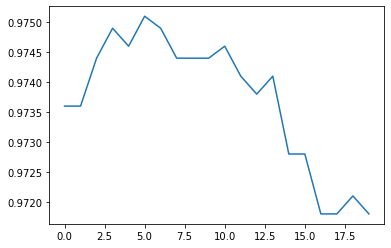

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df["means"])
plt.show()

---